<a href="https://colab.research.google.com/github/preetham018/CODSOFT/blob/main/SPAM_SMS_DETECTION_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
from google.colab import drive
drive.mount("/content/drive")
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/spam.csv",encoding='latin1')


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# 1. data cleaning
# 2. eda
# 3. text preprocessing
# 4. model building
# 5. evaluation
# 6. Improvement
# 7. Deployment
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df = df.iloc[:,0:2]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# renaming col name
new_col_name = {'v1':'target','v2':'text'}
df.rename(columns=new_col_name,inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target']) # ham = 0, spam = 1


In [13]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicates
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep='first')


In [17]:
df.shape


(5169, 2)

In [18]:
df['target'].value_counts()


0    4516
1     653
Name: target, dtype: int64

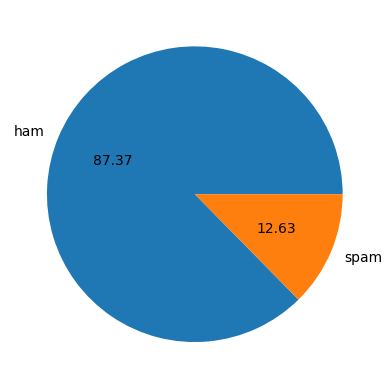

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
df['num_char'] = df['text'].apply(len) #number of characters


In [22]:
def func(message):
    lis = nltk.word_tokenize(message)
    return len(lis)
df['num_words'] = df['text'].apply(func) #number of words


In [23]:
def func1(message):
    lis = nltk.sent_tokenize(message)
    return len(lis)
df['num_sentences'] = df['text'].apply(func1)

In [24]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df.describe()


,target,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [26]:
df[df['target']==1].describe() # analysing spam

,target,num_char,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [27]:
df[df['target']==0].describe() # analysing ham

,target,num_char,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


<Axes: xlabel='num_char', ylabel='Count'>

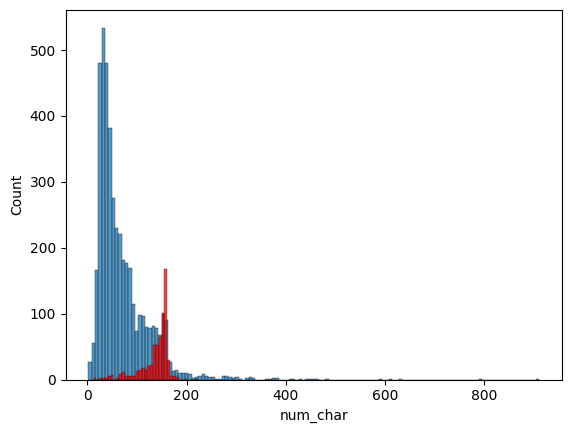

In [28]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

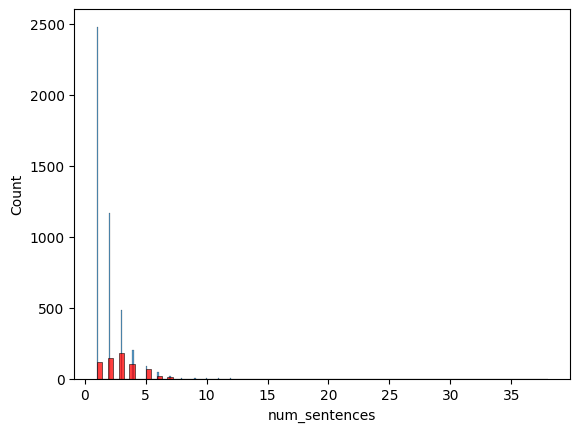

In [29]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

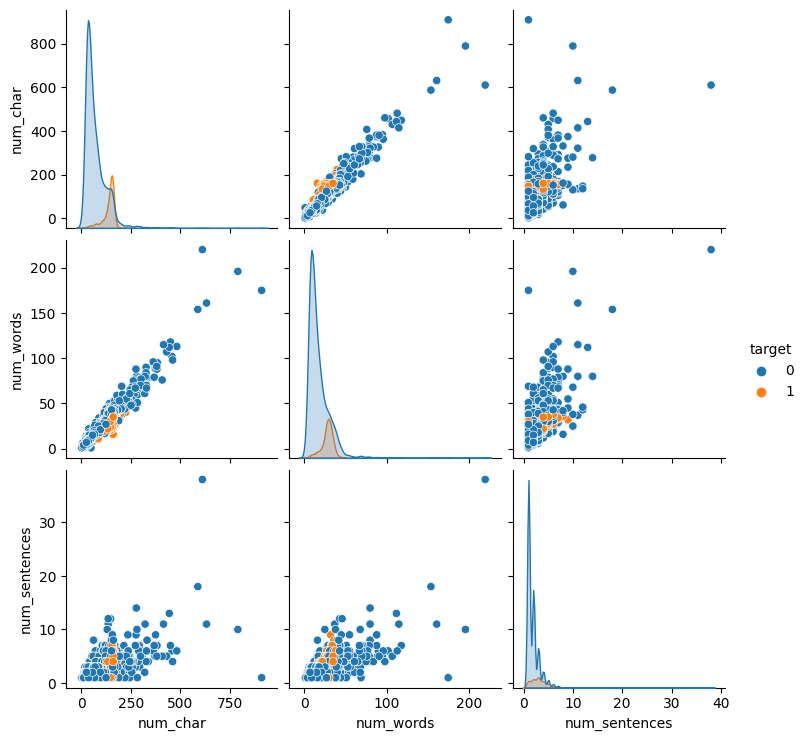

In [30]:
sns.pairplot(df,hue='target')

In [31]:
df[['num_char','num_words','num_sentences']].corr()

,num_char,num_words,num_sentences
num_char,1.000000,0.965760,0.624139
num_words,0.965760,1.000000,0.679971
num_sentences,0.624139,0.679971,1.000000


<Axes: >

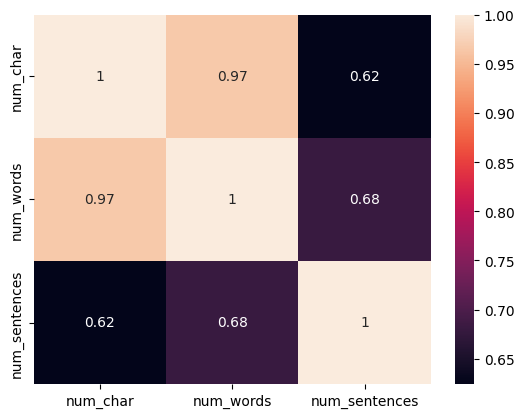

In [32]:
sns.heatmap(df[['num_char','num_words','num_sentences']].corr(),annot=True)


In [33]:
# num_char and num_words has high coorelation => multicollinearity
# lowercase
# tokenization
# removing special characters
# removing stop words and punctuation
# stemming
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i);
    text = y[:] # cloning
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [37]:
import nltk
nltk.download('stopwords')

df['transform_text'] = df['text'].apply(transform_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [38]:
df.head()



,target,text,num_char,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
!nltk.download('stopwords')

/bin/bash: -c: line 1: syntax error near unexpected token `'stopwords''
/bin/bash: -c: line 1: `nltk.download('stopwords')'


In [39]:
!pip install wordcloud


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [41]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))


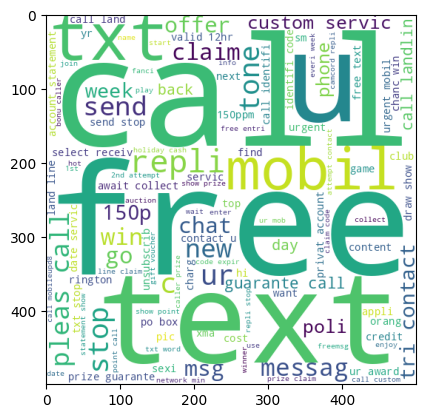

In [42]:
plt.imshow(spam_wc)


In [43]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))



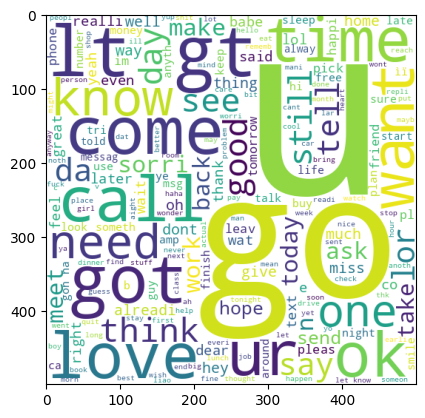

In [44]:
plt.imshow(ham_wc)


In [45]:
df[df['target']==1]['transform_text'].tolist()


['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [47]:
spam_corpus = []
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in  msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

9939

In [49]:
from collections import Counter
df1 = pd.DataFrame(Counter(spam_corpus).most_common(30))
df1.rename(columns={0:'Word',1:'Frequency'},inplace=True)
df1


,Word,Frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


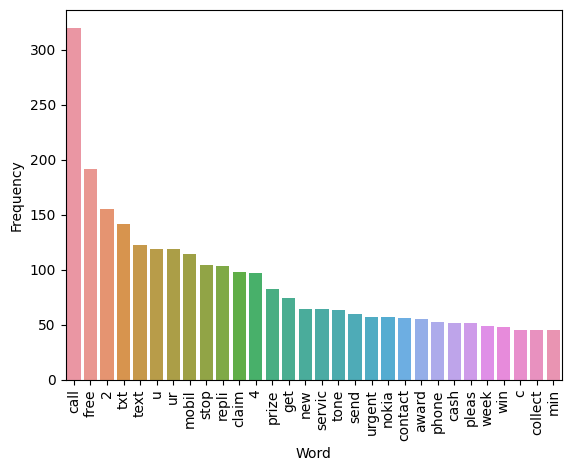

In [50]:
sns.barplot(x = df1['Word'],y = df1['Frequency'])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


In [52]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [54]:
x = df['transform_text'].values
y = df['target'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
x_train = tfidf.fit_transform(x_train).toarray()
x_test = tfidf.transform(x_test).toarray()
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [56]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print("ACCURACY SCORE")
print("Gaussian: ",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print('\n')
print("Multinomial : ",accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print('\n')
print("Bernoulli : ",accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

ACCURACY SCORE
Gaussian:  0.8433268858800773
[[759 137]
 [ 25 113]]
0.452


Multinomial :  0.9690522243713733
[[896   0]
 [ 32 106]]
1.0


Bernoulli :  0.9816247582205029
[[896   0]
 [ 19 119]]
1.0
